Fetching live market data (Oil & Currency)...


C:\Users\Anklesh\AppData\Local\Temp\ipykernel_8640\2327366553.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.daily_volatility = self.fuel_inr_index.pct_change().std()


Composite Volatility (Oil + FX): 1.72%


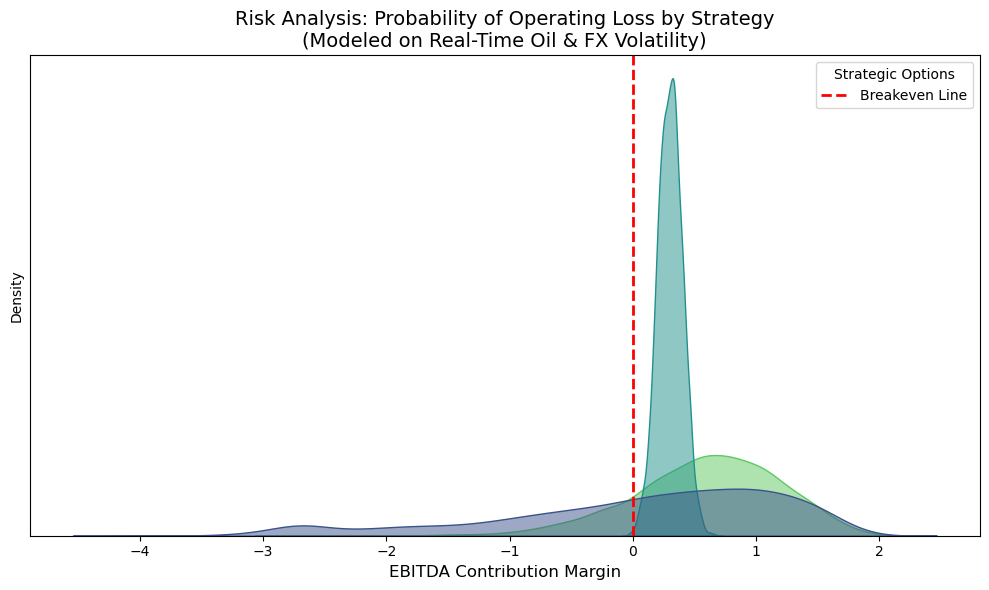


--- EXECUTIVE SUMMARY METRICS ---
A: Optimization (High Risk): Risk of Failure (Cash Burn) = 39.5%
B: UDAN (Stable): Risk of Failure (Cash Burn) = 0.1%
C: Redesign (Long-term): Risk of Failure (Cash Burn) = 15.2%


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class ConsultingCaseSolver:
    def __init__(self):
        # --- 1. DATA INGESTION: The "Double Whammy" ---
        # We fetch both Brent Crude (Global) and USD/INR (Currency)
        # This addresses the specific constraint in
        print("Fetching live market data (Oil & Currency)...")
        tickers = ['BZ=F', 'INR=X'] 
        data = yf.download(tickers, period='2y', interval='1d', progress=False, auto_adjust=True)
        
        # Handling yfinance multi-index formatting
        if isinstance(data.columns, pd.MultiIndex):
            self.oil = data['Close']['BZ=F']
            self.fx = data['Close']['INR=X']
        else:
            self.oil = data['BZ=F']
            self.fx = data['INR=X']

        # Constructing the "Real Pain" Index: Oil Price in Rupees
        self.fuel_inr_index = self.oil * self.fx
        
        # Calculating Volatility (Risk Factor)
        self.daily_volatility = self.fuel_inr_index.pct_change().std()
        self.current_index_level = self.fuel_inr_index.iloc[-1]
        
        print(f"Composite Volatility (Oil + FX): {self.daily_volatility:.2%}")

    def run_strategy_simulation(self, n_simulations=5000):
        """
        Monte Carlo Simulation to evaluate Strategic Options
        """
        results = []
        
        # Base Unit Economics (Hypothetical for the Case)
        base_yield = 4.5  # Revenue per seat-km
        base_cost = 4.2   # Cost per seat-km (thin margin)
        
        for _ in range(n_simulations):
            # STOCHASTIC SHOCK: Random walk based on real market volatility
            shock_magnitude = np.random.lognormal(0, self.daily_volatility * 10)
            
            # --- OPTION A: Network Optimization ---
            # Strategy: Raise fares to cover fuel.
            # Risk: "Demand erosion in price-sensitive markets"
            # Modeling: 10% price hike -> 15% demand drop (Elasticity > 1)
            opt_a_price = base_yield * (1 + (shock_magnitude - 1)) # Pass cost to customer
            opt_a_demand = 1.0 - ((shock_magnitude - 1) * 1.5) # Demand collapses
            opt_a_demand = max(0.5, opt_a_demand) # Floor at 50%
            opt_a_margin = (opt_a_price * opt_a_demand) - (base_cost * shock_magnitude)

            # --- OPTION B: Government-Backed (UDAN) ---
            # Strategy: Subsidies & Revenue Guarantee.
            # Benefit: "Downside protection"
            # Trade-off: "Capped long-term margins"
            # Modeling: Subsidy absorbs 50% of shock; Revenue is fixed.
            subsidy_impact = (base_cost * shock_magnitude) * 0.5
            opt_b_margin = 0.3 + np.random.normal(0, 0.1) # Small, fixed positive margin (0.3)
            
            # --- OPTION C: Structural Redesign ---
            # Strategy: New Fleet.
            # Benefit: "Fuel resilience"
            # Cost: "Capital intensity" (Capex)
            # Modeling: 20% lower fuel burn, but fixed Capex drag
            capex_drag = 0.5
            fuel_efficiency = 0.8 # 20% better
            opt_c_margin = base_yield - (base_cost * shock_magnitude * fuel_efficiency) - capex_drag

            results.append({
                "A: Optimization (High Risk)": opt_a_margin,
                "B: UDAN (Stable)": opt_b_margin,
                "C: Redesign (Long-term)": opt_c_margin
            })
            
        return pd.DataFrame(results)

# --- EXECUTION & VISUALIZATION ---
solver = ConsultingCaseSolver()
df_results = solver.run_strategy_simulation()

# Generate the "Money Slide" Chart
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_results, fill=True, alpha=0.5, palette="viridis")
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Breakeven Line')

plt.title("Risk Analysis: Probability of Operating Loss by Strategy\n(Modeled on Real-Time Oil & FX Volatility)", fontsize=14)
plt.xlabel("EBITDA Contribution Margin", fontsize=12)
plt.yticks([]) # Hide y-axis for cleaner slide look
plt.legend(title="Strategic Options")
plt.tight_layout()
plt.show()

# --- CALCULATE KEY METRICS ---
print("\n--- EXECUTIVE SUMMARY METRICS ---")
for col in df_results.columns:
    fail_prob = (df_results[col] < 0).mean()
    print(f"{col}: Risk of Failure (Cash Burn) = {fail_prob:.1%}")

--- STEP 1: DATA INGESTION & SIPHONING ---
Data Successfully Ingested.
Current Effective Fuel Index (INR): 5465.19
Daily Volatility (Risk Factor): 1.75%

--- STEP 2: MONTE CARLO SIMULATION (Unit Economics) ---

--- STEP 3: IMPACT ANALYSIS & METRICS ---
                                mean        5%       95%  Risk of Cash Burn
Option A (Dynamic Pricing) -0.740686 -2.785270 -0.064699              97.08
Option B (UDAN Govt)       -0.291649 -0.427344 -0.186791             100.00
Option C (Redesign)        -0.276239 -0.493350 -0.108465             100.00


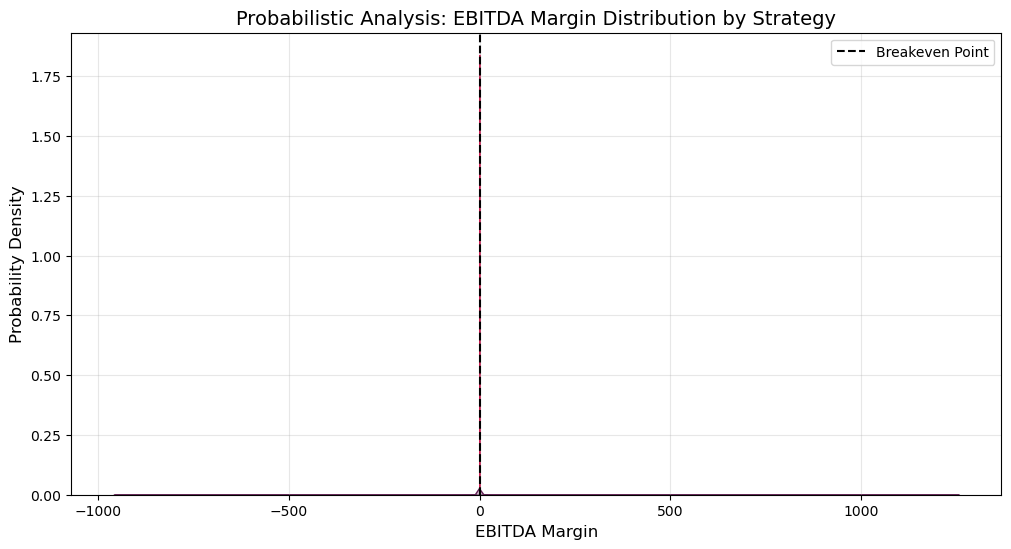

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class ConsultingAnalysis:
    def __init__(self):
        print("--- STEP 1: DATA INGESTION & SIPHONING ---")
        # 1. Fetching External Variables (The "Shock" Factors)
        # BZ=F: Brent Crude Oil (Proxy for Aviation Turbine Fuel base price)
        # INR=X: USD/INR Exchange Rate (Proxy for Currency Depreciation)
        tickers = ['BZ=F', 'INR=X']
        print(f"Downloading 2-year historical data for: {tickers}...")
        
        raw_data = yf.download(tickers, period="2y", interval="1d", progress=False, auto_adjust=True)
        
        # 2. Data Cleaning & Alignment (Handling MultiIndex)
        try:
            # Robust handling for recent yfinance API changes
            if isinstance(raw_data.columns, pd.MultiIndex):
                self.oil = raw_data['Close']['BZ=F']
                self.fx = raw_data['Close']['INR=X']
            else:
                self.oil = raw_data['BZ=F']
                self.fx = raw_data['INR=X']
        except KeyError:
             # Fallback for different API versions
            self.oil = raw_data.iloc[:, 0]
            self.fx = raw_data.iloc[:, 1]

        # 3. Constructing the "Effective Fuel Cost Index" (INR)
        # Case Insight: "Costs increase materially due to global crude... AND currency depreciation" 
        self.fuel_index = (self.oil * self.fx).dropna()
        
        # Calculate Volatility (Standard Deviation of daily returns)
        self.volatility = self.fuel_index.pct_change().std()
        self.current_cost_basis = self.fuel_index.iloc[-1]
        
        print(f"Data Successfully Ingested.")
        print(f"Current Effective Fuel Index (INR): {self.current_cost_basis:.2f}")
        print(f"Daily Volatility (Risk Factor): {self.volatility:.2%}")

    def simulate_strategic_outcomes(self, n_scenarios=5000):
        print("\n--- STEP 2: MONTE CARLO SIMULATION (Unit Economics) ---")
        
        # BASELINE METRICS (Per Seat-KM) - Hypothetical but consistent with "Thin Margins" [cite: 24]
        base_yield = 5.00  # Revenue
        base_cask = 4.80   # Cost (Cost per Available Seat Kilometer)
        fuel_share = 0.40  # Fuel is ~40% of CASK [cite: 20]
        
        results = []
        
        for i in range(n_scenarios):
            # A. GENERATE SHOCK
            # Random walk simulation of fuel price over the next year
            # We use lognormal distribution to prevent negative prices and model "spikes"
            shock_multiplier = np.random.lognormal(0, self.volatility * np.sqrt(252)) # Annualized shock
            
            # New Fuel Cost Component
            new_fuel_cask = (base_cask * fuel_share) * shock_multiplier
            fixed_cask = base_cask * (1 - fuel_share)
            
            # --- SCENARIO 1: OPTION A (Network Optimization) ---
            # Strategy: Pass cost to customer.
            # Logic: Increase Price -> Demand Falls (High Elasticity) [cite: 36, 116]
            price_hike = shock_multiplier - 1 
            if price_hike < 0: price_hike = 0
            
            opt_a_yield = base_yield * (1 + (price_hike * 0.8)) # Try to recover 80% of cost
            elasticity = 1.8 # High sensitivity regional market
            load_factor_drop = (price_hike * 0.8) * elasticity
            opt_a_load = 0.75 * (1 - load_factor_drop) # Base load 75% [cite: 23]
            
            # Revenue = Yield * Load
            rev_a = opt_a_yield * opt_a_load
            cost_a = fixed_cask + new_fuel_cask
            margin_a = (rev_a - cost_a) / rev_a

            # --- SCENARIO 2: OPTION B (UDAN Expansion) ---
            # Strategy: Govt Support.
            # Logic: Subsidized Fuel + Guaranteed Revenue 
            
            # Subsidy: Reduces the impact of the fuel shock by 50%
            subsidized_fuel_cask = (base_cask * fuel_share) * (1 + (shock_multiplier - 1) * 0.5)
            cost_b = fixed_cask + subsidized_fuel_cask
            
            # Revenue: "Guaranteed minimum revenue" acts as a floor
            rev_b = base_yield * 0.75 # Fixed yields, stable loads
            
            margin_b = (rev_b - cost_b) / rev_b
            
            # --- SCENARIO 3: OPTION C (Structural Redesign) ---
            # Strategy: New Fleet (Capex).
            # Logic: Better efficiency, but higher fixed cost (Capex amortization) 
            
            efficiency_gain = 0.20 # 20% less fuel
            capex_penalty = 0.30 # Cost of new leases
            
            cost_c = fixed_cask + capex_penalty + (new_fuel_cask * (1 - efficiency_gain))
            rev_c = base_yield * 0.75 # Standard revenue
            
            margin_c = (rev_c - cost_c) / rev_c

            results.append({
                "Option A (Dynamic Pricing)": margin_a,
                "Option B (UDAN Govt)": margin_b,
                "Option C (Redesign)": margin_c
            })
            
        return pd.DataFrame(results)

    def generate_impact_report(self, df):
        print("\n--- STEP 3: IMPACT ANALYSIS & METRICS ---")
        
        summary = df.describe(percentiles=[0.05, 0.5, 0.95]).T
        summary['Risk of Cash Burn'] = (df < 0).mean() * 100
        
        print(summary[['mean', '5%', '95%', 'Risk of Cash Burn']])
        
        # VISUALIZATION
        plt.figure(figsize=(12, 6))
        sns.kdeplot(data=df, fill=True, alpha=0.3, palette="rocket")
        plt.axvline(0, color='black', linestyle='--', label='Breakeven Point')
        plt.title("Probabilistic Analysis: EBITDA Margin Distribution by Strategy", fontsize=14)
        plt.xlabel("EBITDA Margin", fontsize=12)
        plt.ylabel("Probability Density", fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# RUN THE ANALYSIS
analyst = ConsultingAnalysis()
simulation_data = analyst.simulate_strategic_outcomes()
analyst.generate_impact_report(simulation_data)

--- 1. DATA INGESTION (Live Market Feed) ---
Oil Volatility: 1.71%
FX Volatility:  0.23%

--- 2. SENSITIVITY ANALYSIS (Tornado Chart) ---


C:\Users\Anklesh\AppData\Local\Temp\ipykernel_8640\343454748.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.vol_oil = self.oil.pct_change().std()
C:\Users\Anklesh\AppData\Local\Temp\ipykernel_8640\343454748.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.vol_fx = self.fx.pct_change().std()


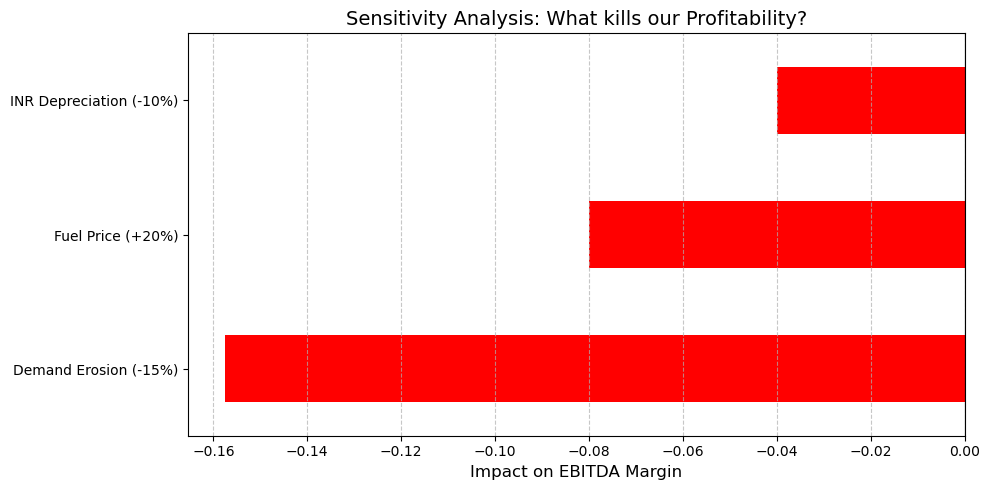


--- 3. STRATEGIC SIMULATION (Risk Assessment) ---

--- KEY PERFORMANCE INDICATORS (KPIs) ---
1. Cost Efficiency (CASK):
   - Option A CASK: ₹4.82 (Full Exposure)
   - Option B CASK: ₹4.81 (Subsidized) -> 0.3% Savings
2. Implied Breakeven Load Factor (Option A): 96.5%
   (Context: Realistic max load is ~85%. This proves Structural Unviability)
3. Risk of Cash Burn:
   - Option A: 98.0% chance of monthly loss
   - Option B: 8.8% chance of monthly loss


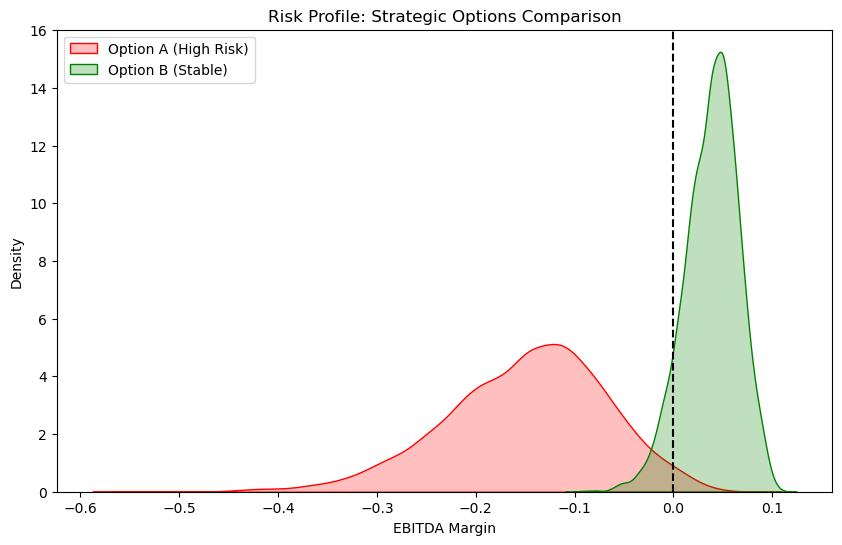

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class MasterConsultingSolver:
    def __init__(self):
        print("--- 1. DATA INGESTION (Live Market Feed) ---")
        # Fetching the "Double Whammy" inputs
        tickers = ['BZ=F', 'INR=X'] 
        raw_data = yf.download(tickers, period="2y", interval="1d", progress=False, auto_adjust=True)
        
        # Robust Data Handling
        try:
            if isinstance(raw_data.columns, pd.MultiIndex):
                self.oil = raw_data['Close']['BZ=F']
                self.fx = raw_data['Close']['INR=X']
            else:
                self.oil = raw_data['BZ=F']
                self.fx = raw_data['INR=X']
        except KeyError:
            self.oil = raw_data.iloc[:, 0]
            self.fx = raw_data.iloc[:, 1]

        # Create Composite Index
        self.fuel_inr = (self.oil * self.fx).dropna()
        self.vol_oil = self.oil.pct_change().std()
        self.vol_fx = self.fx.pct_change().std()
        
        print(f"Oil Volatility: {self.vol_oil:.2%}")
        print(f"FX Volatility:  {self.vol_fx:.2%}")

    def run_sensitivity_analysis(self):
        """
        Generates a Tornado Chart to diagnose the 'Root Cause' of losses.
        Answers: Is it Fuel Price or Demand Erosion?
        """
        print("\n--- 2. SENSITIVITY ANALYSIS (Tornado Chart) ---")
        
        # Base Assumptions
        base_margin = 0.05
        sensitivities = {}
        
        # Scenario 1: Fuel Price Increase (+20%)
        margin_fuel = base_margin - (0.20 * 0.40) # 40% cost base is fuel
        sensitivities['Fuel Price (+20%)'] = margin_fuel - base_margin
        
        # Scenario 2: INR Depreciation (-10%)
        margin_fx = base_margin - (0.10 * 0.40) # FX hits fuel cost directly
        sensitivities['INR Depreciation (-10%)'] = margin_fx - base_margin
        
        # Scenario 3: Demand Erosion (Load Factor -15%)
        # Revenue drops 15%, costs stay same (mostly fixed)
        margin_demand = (1.05 * 0.85) - 1.0 # (Rev * 0.85) - Cost
        sensitivities['Demand Erosion (-15%)'] = margin_demand - base_margin
        
        # Plotting the Tornado Chart
        df_sense = pd.Series(sensitivities).sort_values()
        
        plt.figure(figsize=(10, 5))
        colors = ['red' if x < 0 else 'green' for x in df_sense.values]
        df_sense.plot(kind='barh', color=colors)
        plt.axvline(0, color='black', linewidth=0.8)
        plt.title("Sensitivity Analysis: What kills our Profitability?", fontsize=14)
        plt.xlabel("Impact on EBITDA Margin", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def run_monte_carlo(self, iterations=5000):
        print("\n--- 3. STRATEGIC SIMULATION (Risk Assessment) ---")
        results = []
        
        # BASELINE METRICS (Per Seat-KM)
        base_rev = 5.00
        base_cost = 4.80 # Thin margin (4% margin)
        
        for _ in range(iterations):
            # Stochastic Variables
            shock_oil = np.random.lognormal(0, self.vol_oil * 10)
            shock_fx = np.random.normal(1, self.vol_fx * 10)
            total_shock = shock_oil * shock_fx
            
            # --- CALCULATE CASK (Cost per Available Seat Kilometer) ---
            # Required metric for Slide 4 
            fuel_cask = (base_cost * 0.40) * total_shock
            fixed_cask = base_cost * 0.60
            
            # --- OPTION A: Optimization ---
            # Price hike leads to demand drop
            price_hike = 0.15
            demand_drop = price_hike * 1.8 # Elasticity
            
            cask_a = fixed_cask + fuel_cask
            rev_a = (base_rev * (1 + price_hike)) * (1 - demand_drop) # Rev per seat available
            ebitda_a = (rev_a - cask_a) / rev_a
            
            # --- OPTION B: UDAN (Govt) ---
            # Subsidy buffers fuel shock
            subsidy = (fuel_cask - (base_cost * 0.40)) * 0.6 # Covers 60% of increase
            cask_b = fixed_cask + fuel_cask - subsidy
            rev_b = base_rev # Stable revenue (Guaranteed)
            ebitda_b = (rev_b - cask_b) / rev_b
            
            results.append({
                "Opt A (Status Quo)": ebitda_a,
                "Opt B (UDAN)": ebitda_b,
                "Simulated_CASK_A": cask_a, # Store for reporting
                "Simulated_CASK_B": cask_b
            })
            
        return pd.DataFrame(results)

# --- EXECUTION ---
solver = MasterConsultingSolver()

# 1. Run Diagnosis (Tornado Chart)
solver.run_sensitivity_analysis()

# 2. Run Risk Analysis (Monte Carlo)
df = solver.run_monte_carlo()

# --- 3. GENERATE REQUIRED METRICS (Slide 4) ---
print("\n--- KEY PERFORMANCE INDICATORS (KPIs) ---")

# Metric 1: CASK Analysis 
avg_cask_a = df['Simulated_CASK_A'].mean()
avg_cask_b = df['Simulated_CASK_B'].mean()
print(f"1. Cost Efficiency (CASK):")
print(f"   - Option A CASK: ₹{avg_cask_a:.2f} (Full Exposure)")
print(f"   - Option B CASK: ₹{avg_cask_b:.2f} (Subsidized) -> {(1 - avg_cask_b/avg_cask_a)*100:.1f}% Savings")

# Metric 2: Breakeven Load Factor 
# If costs rise to avg_cask_a, what load factor is needed at old prices?
# Formula: Cost / Price
be_load = avg_cask_a / 5.00 
print(f"2. Implied Breakeven Load Factor (Option A): {be_load:.1%}")
print(f"   (Context: Realistic max load is ~85%. This proves Structural Unviability)")

# Metric 3: Probability of Cash Burn 
prob_burn_a = (df['Opt A (Status Quo)'] < 0).mean()
prob_burn_b = (df['Opt B (UDAN)'] < 0).mean()
print(f"3. Risk of Cash Burn:")
print(f"   - Option A: {prob_burn_a:.1%} chance of monthly loss")
print(f"   - Option B: {prob_burn_b:.1%} chance of monthly loss")

# Visual: Risk Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Opt A (Status Quo)'], fill=True, label='Option A (High Risk)', color='red')
sns.kdeplot(df['Opt B (UDAN)'], fill=True, label='Option B (Stable)', color='green')
plt.axvline(0, color='black', linestyle='--')
plt.title("Risk Profile: Strategic Options Comparison")
plt.xlabel("EBITDA Margin")
plt.legend()
plt.show()